# INTRUSION DETECTOR on One-Class SVM

Author: H.Moghadasi & H.Barghi

https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names

## Attack_types

back                dos
buffer_overflow     u2r
ftp_write           r2l
guess_passwd        r2l
imap                r2l
ipsweep             probe
land                dos
loadmodule          u2r
multihop            r2l
neptune             dos
nmap                probe
perl                u2r
phf                 r2l
pod                 dos
portsweep           probe
rootkit             u2r
satan               probe
smurf               dos
spy                 r2l
teardrop            dos
warezclient         r2l
warezmaster         r2l

## DERIVED FEATURES of the UCI Knowledge Discovery in Databases (KDD) 
duration:                               continuous.
protocol_type:                          symbolic.
service:                                symbolic.
flag:                                   symbolic.
src_bytes:                              continuous.
dst_bytes:                              continuous.
land:                                   symbolic.
wrong_fragment:                         continuous.
urgent:                                 continuous.
hot:                                    continuous.
num_failed_logins:                      continuous.
logged_in:                              symbolic.
num_compromised:                        continuous.
root_shell:                             continuous.
su_attempted:                           continuous.
num_root:                               continuous.
num_file_creations:                     continuous.
num_shells:                             continuous.
num_access_files:                       continuous.
num_outbound_cmds:                      continuous.
is_host_login:                          symbolic.
is_guest_login:                         symbolic.
count:                                  continuous.
srv_count:                              continuous.
serror_rate:                            continuous.
srv_serror_rate:                        continuous.
rerror_rate:                            continuous.
srv_rerror_rate:                        continuous.
same_srv_rate:                          continuous.
diff_srv_rate:                          continuous.
srv_diff_host_rate:                     continuous.
dst_host_count:                         continuous.
dst_host_srv_count:                     continuous.
dst_host_same_srv_rate:                 continuous.
dst_host_diff_srv_rate:                 continuous.
dst_host_same_src_port_rate:            continuous.
dst_host_srv_diff_host_rate:            continuous.
dst_host_serror_rate:                   continuous.
dst_host_srv_serror_rate:               continuous.
dst_host_rerror_rate:                   continuous.
dst_host_srv_rerror_rate:               continuous.

In [46]:
import pandas as pd

# نام ستون‌ها بر اساس مستندات KDD
column_names = ['duration','protocol_type','service','flag','src_bytes',
                'dst_bytes','land','wrong_fragment','urgent','hot',
                'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
                'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
                'is_host_login','is_guest_login','count','srv_count','serror_rate',
                'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                'dst_host_rerror_rate','dst_host_srv_rerror_rate','label'
                ]

df_train = pd.read_csv('kddcup.data.corrected', names=column_names, index_col=False)
df_test = pd.read_csv('corrected', names=column_names, index_col=False)

print("*.*"*20)
df_train.info()
print("\n"*2,"*.*"*20)
df_test.info()

*.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells             

In [47]:
print(f"object columns: \t{list(set(df_train.columns)-set(df_train._get_numeric_data().columns))}")
print("\n","*.*"*20)
print("نمایش اطلاعات اولیه دادههای آموزش")
print(f"[Sample_num X Feature_num]:\t [{df_train.shape[0]} X {df_train.shape[1]}]\n")

print("\nprotocol_type:\t", df_train['protocol_type'].unique())
print("\nservice types:\t", df_train['service'].unique()) #[:10]
print("\nflag types:\t", df_train['flag'].unique()) #[:10]
print("\n","فراوانی برچسب‌ها:")
print(df_train['label'].value_counts())

print("\n","*.*"*20)
print("نمایش اطلاعات اولیه دادههای تست")
print(f"[Sample_num X Feature_num]:\t [{df_test.shape[0]} X {df_test.shape[1]}]\n")
print("\nservice types:\t", df_test['protocol_type'].unique())
print("\nservice types:\t", df_test['service'].unique()) #[:10]
print("\nflag types:\t", df_test['flag'].unique()) #[:10]
print("\n","فراوانی برچسب‌ها:")
print(df_test['label'].value_counts())


object columns: 	['label', 'service', 'flag', 'protocol_type']

 *.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.*
نمایش اطلاعات اولیه دادههای آموزش
[Sample_num X Feature_num]:	 [4898431 X 42]


protocol_type:	 ['tcp' 'udp' 'icmp']

service types:	 ['http' 'smtp' 'domain_u' 'auth' 'finger' 'telnet' 'eco_i' 'ftp' 'ntp_u'
 'ecr_i' 'other' 'urp_i' 'private' 'pop_3' 'ftp_data' 'netstat' 'daytime'
 'ssh' 'echo' 'time' 'name' 'whois' 'domain' 'mtp' 'gopher' 'remote_job'
 'rje' 'ctf' 'supdup' 'link' 'systat' 'discard' 'X11' 'shell' 'login'
 'imap4' 'nntp' 'uucp' 'pm_dump' 'IRC' 'Z39_50' 'netbios_dgm' 'ldap'
 'sunrpc' 'courier' 'exec' 'bgp' 'csnet_ns' 'http_443' 'klogin' 'printer'
 'netbios_ssn' 'pop_2' 'nnsp' 'efs' 'hostnames' 'uucp_path' 'sql_net'
 'vmnet' 'iso_tsap' 'netbios_ns' 'kshell' 'urh_i' 'http_2784' 'harvest'
 'aol' 'tftp_u' 'http_8001' 'tim_i' 'red_i']

flag types:	 ['SF' 'S2' 'S1' 'S3' 'OTH' 'REJ' 'RSTO' 'S0' 'RSTR' 'RSTOS0' 'SH']

 فراوانی برچسب‌ها:
label
smurf.       

In [48]:
print("============================ Statistical analysis ============================")
print("Statistical description of KDD Cup_99 Train Data")
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 100)
print(f"{df_train.describe()}")
print("\n\n","="*100)
print("\nStatistical description of KDD Cup_99 Test Data")

print(f"{df_test.describe()}")


============================ Statistical analysis ============================
Statistical description of KDD Cup_99 Train Data
           duration     src_bytes     dst_bytes          land  wrong_fragment        urgent           hot  num_failed_logins     logged_in  num_compromised    root_shell  su_attempted      num_root  \
count  4.898431e+06  4.898431e+06  4.898431e+06  4.898431e+06    4.898431e+06  4.898431e+06  4.898431e+06       4.898431e+06  4.898431e+06     4.898431e+06  4.898431e+06  4.898431e+06  4.898431e+06   
mean   4.834243e+01  1.834621e+03  1.093623e+03  5.716116e-06    6.487792e-04  7.961733e-06  1.243766e-02       3.205108e-05  1.435290e-01     8.088304e-03  6.818510e-05  3.674646e-05  1.293496e-02   
std    7.233298e+02  9.414311e+05  6.450123e+05  2.390833e-03    4.285434e-02  7.215084e-03  4.689782e-01       7.299408e-03  3.506116e-01     3.856481e+00  8.257146e-03  8.082432e-03  3.938075e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.0

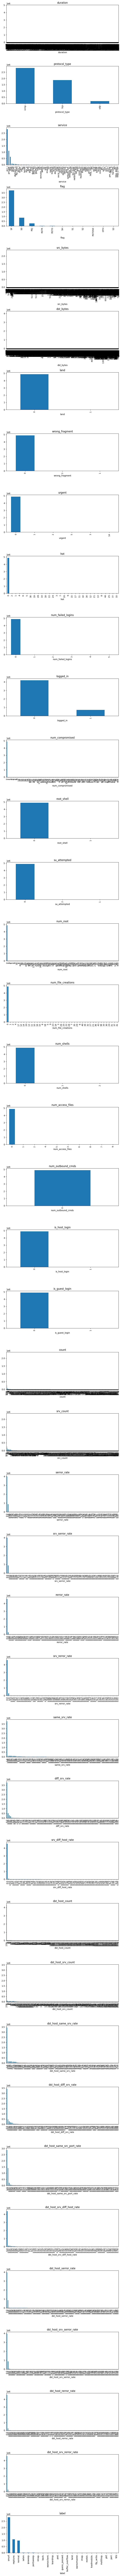

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(column_names), 1, figsize=(8, 8*len(column_names)))
axes = axes.flatten()
for ax, col in zip(axes, column_names):
    df_train[col].value_counts().plot(kind="bar", ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [ ]:

# کدگذاری ویژگی‌های دسته‌ای
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_train_encoded = df_train
# کد گذاری ویژگی‌های به روش عددی
label_enc = LabelEncoder()
df_train_encoded['protocol_type'] = label_enc.fit_transform(df_train['protocol_type'])
df_train_encoded['service'] = label_enc.fit_transform(df_train['service'])
df_train_encoded['flag'] = label_enc.fit_transform(df_train['flag'])

# کد گذاری ویژگی‌های به روش One-Hot Encoding
# df_train_encoded = pd.get_dummies(df_train, columns=['protocol_type', 'service', 'flag'])

df_train_encoded.head()

In [64]:
#Splitting features and target
import numpy as np

X = df_train_encoded.drop(['label'], axis=1)
y = label_enc.fit_transform(df_train_encoded['label'])

print(np.unique(y))
label_enc.inverse_transform(np.unique(y))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

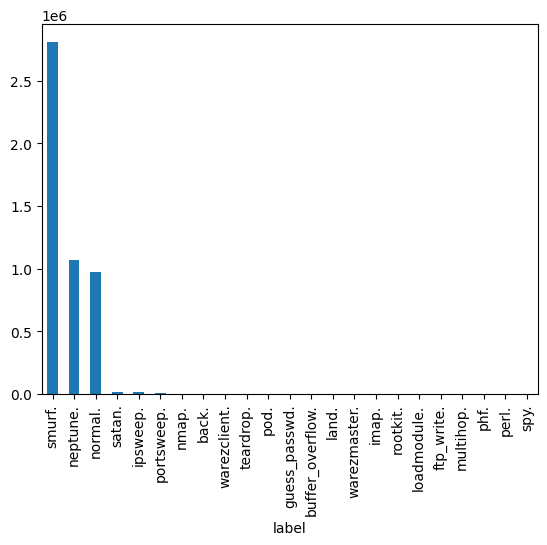

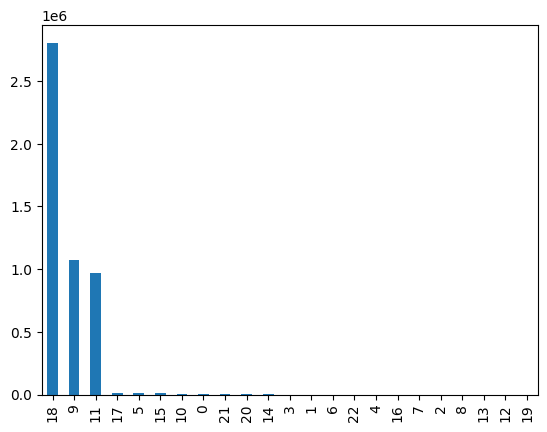

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

#bar_graph('label')
df_train_encoded['label'].value_counts().plot(kind="bar")
plt.show()

pd.Series(y).value_counts().plot(kind="bar")
plt.show()

Intrusion Detection System using One-Class SVM
Dataset: KDD Cup 1999 (Full)

In [74]:
"""
َAnomaly Detection System using One-Class SVM
Dataset: KDD Cup 1999
"""

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_curve, auc, precision_recall_curve,
                             average_precision_score, f1_score, 
                             precision_score, recall_score)
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time
import traceback
from datetime import datetime

# visualization setting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

COLOR_NORMAL = '#2E8B57'   # سبز دریا
COLOR_ANOMALY = '#DC143C'  # قرمز کریمسون
COLOR_THRESHOLD = '#000000'
COLOR_ACCENT = '#4169E1'   # آبی رویال

# ============================================================================
# KDD Preprocessor
# ============================================================================
class KDDPreprocessor:
    def __init__(self):
        self.column_names = [
            'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
            'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
            'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
            'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
            'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
        ]
        
        # تعریف مستقیم ویژگی‌ها (جلوگیری از خطا)
        self.categorical_features = ['protocol_type', 'service', 'flag']
        self.binary_features = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
        
        # لیست مستقیم ویژگی‌های عددی
        self.numerical_features = [
            'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 
            'hot', 'num_failed_logins', 'num_compromised', 'num_root', 
            'num_file_creations', 'num_shells', 'num_access_files', 
            'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
            'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
            'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
            'dst_host_srv_rerror_rate'
        ]
        
        # ویژگی‌های اضافی که ممکن است در داده وجود داشته باشند
        self.additional_features = ['root_shell', 'su_attempted']
        
        self.preprocessor = None
        self.feature_names_ = None
    
    def load_data(self, filepath, sample_size=None):
        """بارگذاری داده‌ها با مدیریت خطاهای احتمالی"""
        print(f"📂 در حال بارگذاری داده‌ها از {filepath}...")
        try:
            if sample_size:
                df = pd.read_csv(filepath, names=self.column_names, nrows=sample_size, low_memory=False)
            else:
                df = pd.read_csv(filepath, names=self.column_names, low_memory=False)
            
            print(f"✅ بارگذاری موفق: {df.shape[0]:,} نمونه، {df.shape[1]} ویژگی")
            print(f"   ستون‌های موجود: {list(df.columns)}")
            
            # بررسی تطابق ستون‌ها
            expected_cols = set(self.column_names)
            actual_cols = set(df.columns)
            missing = expected_cols - actual_cols
            extra = actual_cols - expected_cols
            
            if missing:
                print(f"⚠️  هشدار: ستون‌های گمشده: {missing}")
            if extra:
                print(f"⚠️  هشدار: ستون‌های اضافی: {extra}")
            
            return df
            
        except Exception as e:
            print(f"❌ خطا در بارگذاری داده: {e}")
            raise
    
    def analyze_labels(self, df):
        """تحلیل و دسته‌بندی برچسب‌ها"""
        #print("\n🔍 در حال تحلیل برچسب‌ها...")
        
        # نمایش مقادیر منحصربه‌فرد برچسب‌ها
        #unique_labels = df['label'].unique()[:20]  # نمایش ۲۰ مورد اول
        #print(f"   تعداد برچسب‌های منحصربه‌فرد: {df['label'].nunique()}")
        #print(f"   نمونه برچسب‌ها: {unique_labels}")
        
        # نگاشت حملات به دسته‌ها
        attack_map = {
            'normal': ['normal'],
            'dos': ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop'],
            'probe': ['ipsweep', 'nmap', 'portsweep', 'satan'],
            'r2l': ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster'],
            'u2r': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
        }
        
        # تابع دسته‌بندی
        def categorize(label):
            label_str = str(label).replace('.', '').strip().lower()
            
            # بررسی normal
            if label_str == 'normal':
                return 'normal'
            
            # بررسی سایر دسته‌ها
            for category, attacks in attack_map.items():
                if category != 'normal' and any(attack in label_str for attack in attacks):
                    return category
            
            # اگر هیچ کدام نبود
            return 'other'
        
        # اعمال دسته‌بندی
        df['attack_category'] = df['label'].apply(categorize)
        
        # نمایش آمار
        category_stats = df['attack_category'].value_counts()
        print("\n📊 توزیع دسته‌های حمله:")
        for category, count in category_stats.items():
            percentage = (count / len(df)) * 100
            print(f"   {category:10s}: {count:8,} ({percentage:6.2f}%)")
        
        return df
    
    def create_preprocessor(self, X):
        """ایجاد پیش‌پردازشگر با بررسی ستون‌های موجود"""
        print("\n⚙️ در حال ایجاد پیش‌پردازشگر...")
        
        # بررسی ستون‌های موجود در X
        available_cols = set(X.columns)
        
        # فیلتر کردن ویژگی‌های موجود
        num_features = [col for col in self.numerical_features if col in available_cols]
        cat_features = [col for col in self.categorical_features if col in available_cols]
        bin_features = [col for col in self.binary_features if col in available_cols]
        
        print(f"   ویژگی‌های عددی موجود: {len(num_features)} از {len(self.numerical_features)}")
        print(f"   ویژگی‌های دسته‌ای موجود: {len(cat_features)} از {len(self.categorical_features)}")
        print(f"   ویژگی‌های باینری موجود: {len(bin_features)} از {len(self.binary_features)}")
        
        # ایجاد transformers
        transformers = []
        
        if num_features:
            numerical_transformer = Pipeline(steps=[
                ('scaler', StandardScaler())
            ])
            transformers.append(('num', numerical_transformer, num_features))
        
        if cat_features:
            categorical_transformer = Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ])
            transformers.append(('cat', categorical_transformer, cat_features))
        
        if bin_features:
            transformers.append(('bin', 'passthrough', bin_features))
        
        # ایجاد ColumnTransformer
        if not transformers:
            raise ValueError("❌ هیچ ویژگی‌ای برای پردازش پیدا نشد!")
        
        self.preprocessor = ColumnTransformer(
            transformers=transformers,
            remainder='drop'
        )
        
        return self.preprocessor
    
    def prepare_features(self, df, fit=True):
        """آماده‌سازی ویژگی‌ها با مدیریت خطا"""
        print(f"\n🔧 آماده‌سازی ویژگی‌ها (fit={fit})...")
        
        # جدا کردن ویژگی‌ها و برچسب‌ها
        X = df.copy()
        
        # حذف ستون‌های غیرویژگی
        cols_to_drop = ['label', 'attack_category']
        for col in cols_to_drop:
            if col in X.columns:
                X = X.drop(col, axis=1)
        
        print(f"   شکل داده ورودی: {X.shape}")
        print(f"   ستون‌های موجود: {list(X.columns)}")
        
        # بررسی وجود داده
        if len(X) == 0:
            raise ValueError("❌ داده ورودی خالی است!")
        
        # ایجاد یا استفاده از preprocessor موجود
        if self.preprocessor is None or fit:
            self.create_preprocessor(X)
        
        # تبدیل ویژگی‌ها
        try:
            if fit:
                X_processed = self.preprocessor.fit_transform(X)
            else:
                X_processed = self.preprocessor.transform(X)
            
            print(f"✅ آماده‌سازی موفق: شکل خروجی = {X_processed.shape}")
            return X_processed
            
        except Exception as e:
            print(f"❌ خطا در پیش‌پردازش: {e}")
            raise

# ============================================================================
# Intrusion Detection OC_SVM
# ============================================================================
class IntrusionDetectionOCSVM:
    def __init__(self, nu=0.05, kernel='rbf', gamma='scale', random_state=42):
        self.model = OneClassSVM(
            nu=nu, 
            kernel=kernel, 
            gamma=gamma, 
            cache_size=2000,
            verbose=False
        )
        self.scaler = StandardScaler()
        self.pca = None
        self.threshold = None
        self.training_time = None
        self.random_state = random_state
    
    def train(self, X_train_normal, use_pca=True, n_components=0.95):
        """آموزش مدل با مدیریت خطا"""
        print("\n🎯 شروع آموزش One-Class SVM...")
        print(f"   ابعاد داده آموزش: {X_train_normal.shape}")
        
        if len(X_train_normal) == 0:
            raise ValueError("❌ داده آموزش خالی است!")
        
        start_time = time.time()
        
        # استانداردسازی
        print("   1. استانداردسازی داده‌ها...")
        X_scaled = self.scaler.fit_transform(X_train_normal)
        
        # کاهش ابعاد (اختیاری)
        if use_pca and X_scaled.shape[1] > 2:
            print(f"   2. کاهش ابعاد با PCA (n_components={n_components})...")
            self.pca = PCA(n_components=n_components, random_state=self.random_state)
            X_processed = self.pca.fit_transform(X_scaled)
            explained_variance = sum(self.pca.explained_variance_ratio_)
            print(f"      → ابعاد جدید: {X_processed.shape[1]} مؤلفه")
            print(f"      → واریانس حفظ شده: {explained_variance:.2%}")
        else:
            X_processed = X_scaled
            print(f"   2. PCA غیرفعال. ابعاد حفظ شده: {X_processed.shape[1]}")
        
        # آموزش مدل
        print("   3. آموزش مدل One-Class SVM...")
        self.model.fit(X_processed)
        
        # محاسبه آستانه
        print("   4. محاسبه آستانه تصمیم‌گیری...")
        scores = self.model.decision_function(X_processed)
        self.threshold = np.percentile(scores, 5)  # 5% پایین‌ترین scores
        
        self.training_time = time.time() - start_time
        print(f"\n✅ آموزش تکمیل شد!")
        print(f"   زمان آموزش: {self.training_time:.2f} ثانیه")
        print(f"   آستانه تصمیم: {self.threshold:.4f}")
        
        return self
    
    def predict(self, X, return_scores=False):
        """پیش‌بینی با مدیریت خطا"""
        if self.scaler is None or self.model is None:
            raise ValueError("❌ مدل هنوز آموزش ندیده است!")
        
        # استانداردسازی
        X_scaled = self.scaler.transform(X)
        
        # کاهش ابعاد (اگر PCA استفاده شده)
        if self.pca is not None:
            X_processed = self.pca.transform(X_scaled)
        else:
            X_processed = X_scaled
        
        # محاسبه scores
        scores = self.model.decision_function(X_processed)
        
        # پیش‌بینی بر اساس آستانه
        predictions = np.where(scores >= self.threshold, 0, 1)  # 0=normal, 1=anomaly
        
        return (predictions, scores) if return_scores else predictions

# ============================================================================
# Advanced Model Evaluator
# ============================================================================
class AdvancedModelEvaluator:
    def __init__(self, model, preprocessor, test_data=None):
        self.model = model
        self.preprocessor = preprocessor
        self.test_data = test_data
        self.timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    def comprehensive_evaluation(self, y_true, y_pred, scores):
        pass
    
    def plot_confusion_matrix_advanced(self, cm):
        pass
    
    def plot_anomaly_scores_distribution(self, scores_normal, scores_anomaly):
        pass
    
    def plot_roc_and_pr_curves(self, y_true, scores):
        pass
    
    def plot_attack_type_performance(self, test_data, y_pred):
        pass

# ============================================================================
# تابع اصلی با مدیریت خطا و دیباگ
# ============================================================================
# ============================================================================
# اجرای اسکریپت
# ============================================================================
if __name__ == "__main__":
    try:
        preprocessor = KDDPreprocessor()
        X = X
        y = y
        df_train_encoded = df_train_encoded
        # تحلیل برچسب‌ها
        df = preprocessor.analyze_labels(df_train_encoded)

    except Exception as e:
        print(f"\n❌ خطای ناشناخته: {e}")
        print("\nجزئیات خطا:")
        traceback.print_exc()
    
    
"""    
    try:
        # مرحله 1: بارگذاری و تحلیل داده
        print("\n1️⃣ مرحله اول: بارگذاری و تحلیل داده‌ها")
        preprocessor = KDDPreprocessor()
        
        # بارگذاری داده
        # df = preprocessor.load_data(DATA_PATH, sample_size=SAMPLE_SIZE)
        X = X
        y = y
        df_train_encoded = df_train_encoded
        # تحلیل برچسب‌ها
        df = preprocessor.analyze_labels(df_train_encoded)
        
        # بررسی داده‌های normal
        normal_data = df[df['attack_category'] == 'normal']
        anomaly_data = df[df['attack_category'] != 'normal']
        
        print(f"\n📊 آمار کل داده:")
        print(f"   کل داده‌ها: {len(df):,}")
        print(f"   داده‌های عادی: {len(normal_data):,} ({len(normal_data)/len(df)*100:.1f}%)")
        print(f"   داده‌های آنومالی: {len(anomaly_data):,} ({len(anomaly_data)/len(df)*100:.1f}%)")
        
        if len(normal_data) == 0:
            print("⚠️  هشدار: هیچ داده عادی یافت نشد! One-Class SVM نیاز به داده عادی دارد.")
            print("   راه‌حل: از داده‌های برچسب‌دار اصلی استفاده کنید.")
            return None
        
        # مرحله 2: تقسیم داده
        print("\n2️⃣ مرحله دوم: تقسیم داده‌ها")
        
        # محاسبه سایزها با توجه به داده موجود
        train_normal_size = min(50000, len(normal_data) // 2)
        test_normal_size = min(10000, len(normal_data) - train_normal_size)
        test_anomaly_size = min(10000, len(anomaly_data))
        
        print(f"   سایز آموزش (عادی): {train_normal_size:,}")
        print(f"   سایز تست (عادی): {test_normal_size:,}")
        print(f"   سایز تست (آنومالی): {test_anomaly_size:,}")
        
        train_normal = normal_data.sample(train_normal_size, random_state=42)
        test_normal = normal_data.drop(train_normal.index).sample(test_normal_size, random_state=42)
        test_anomaly = anomaly_data.sample(test_anomaly_size, random_state=42)
        
        test_data = pd.concat([test_normal, test_anomaly])
        
        print(f"\n✅ تقسیم داده موفق:")
        print(f"   آموزش: {len(train_normal):,} نمونه عادی")
        print(f"   تست: {len(test_data):,} نمونه ({len(test_normal):,} عادی + {len(test_anomaly):,} آنومالی)")
        
        # مرحله 3: آماده‌سازی ویژگی‌ها
        print("\n3️⃣ مرحله سوم: آماده‌سازی ویژگی‌ها")
        
        print("   آماده‌سازی داده آموزش...")
        X_train = preprocessor.prepare_features(train_normal, fit=True)
        
        print("   آماده‌سازی داده تست...")
        X_test = preprocessor.prepare_features(test_data, fit=False)
        
        # برچسب‌های تست
        y_test = (test_data['attack_category'] != 'normal').astype(int).values
        
        print(f"\n✅ آماده‌سازی ویژگی‌ها موفق:")
        print(f"   X_train: {X_train.shape}")
        print(f"   X_test: {X_test.shape}")
        print(f"   y_test: {y_test.shape} (توزیع: {np.bincount(y_test)})")
        
        # مرحله 4: آموزش مدل
        print("\n4️⃣ مرحله چهارم: آموزش مدل One-Class SVM")
        
        model = IntrusionDetectionOCSVM(nu=0.05, kernel='rbf', gamma='scale')
        model.train(X_train, use_pca=True, n_components=0.95)
        
        # مرحله 5: پیش‌بینی و ارزیابی
        print("\n5️⃣ مرحله پنجم: پیش‌بینی و ارزیابی")
        
        y_pred, scores = model.predict(X_test, return_scores=True)
        
        # مرحله 6: ارزیابی پیشرفته
        print("\n6️⃣ مرحله ششم: ارزیابی جامع")
        
        evaluator = AdvancedModelEvaluator(model, preprocessor, test_data)
        metrics, cm = evaluator.comprehensive_evaluation(y_test, y_pred, scores)
        
        # مرحله 7: Visualization
        print("\n7️⃣ مرحله هفتم: تولید نمودارها")
        
        print("   تولید ماتریس درهم‌ریختگی...")
        evaluator.plot_confusion_matrix_advanced(cm)
        
        print("   تولید توزیع امتیازها...")
        evaluator.plot_anomaly_scores_distribution(
            scores[y_test==0], 
            scores[y_test==1]
        )
        
        print("   تولید منحنی‌های ROC و Precision-Recall...")
        roc_auc, pr_auc = evaluator.plot_roc_and_pr_curves(y_test, scores)
        
        print("   تحلیل عملکرد بر اساس نوع حمله...")
        evaluator.plot_attack_type_performance(test_data, y_pred)
        
        # مرحله 8: ذخیره مدل
        print("\n8️⃣ مرحله هشتم: ذخیره نتایج")
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M")
        filename = f'ocsvm_ids_model_{timestamp}.pkl'
        
        joblib.dump({
            'model': model,
            'preprocessor': preprocessor,
            'metrics': metrics,
            'roc_auc': roc_auc,
            'pr_auc': pr_auc,
            'test_data_shape': X_test.shape,
            'timestamp': timestamp
        }, filename)
        
        print(f"✅ مدل و نتایج در '{filename}' ذخیره شد.")
        
        # گزارش نهایی
        print("\n" + "="*90)
        print("🎉 پروژه با موفقیت تکمیل شد!")
        print("="*90)
        
        return model, preprocessor, evaluator
    
    except Exception as e:
        print(f"\n❌ خطای ناشناخته: {e}")
        print("\nجزئیات خطا:")
        traceback.print_exc()
        
"""




📊 توزیع دسته‌های حمله:
   dos       : 3,883,370 ( 79.28%)
   normal    :  972,781 ( 19.86%)
   probe     :   41,102 (  0.84%)
   r2l       :    1,126 (  0.02%)
   u2r       :       52 (  0.00%)


'    \n    try:\n        # مرحله 1: بارگذاری و تحلیل داده\n        print("\n1️⃣ مرحله اول: بارگذاری و تحلیل داده\u200cها")\n        preprocessor = KDDPreprocessor()\n\n        # بارگذاری داده\n        # df = preprocessor.load_data(DATA_PATH, sample_size=SAMPLE_SIZE)\n        X = X\n        y = y\n        df_train_encoded = df_train_encoded\n        # تحلیل برچسب\u200cها\n        df = preprocessor.analyze_labels(df_train_encoded)\n\n        # بررسی داده\u200cهای normal\n        normal_data = df[df[\'attack_category\'] == \'normal\']\n        anomaly_data = df[df[\'attack_category\'] != \'normal\']\n\n        print(f"\n📊 آمار کل داده:")\n        print(f"   کل داده\u200cها: {len(df):,}")\n        print(f"   داده\u200cهای عادی: {len(normal_data):,} ({len(normal_data)/len(df)*100:.1f}%)")\n        print(f"   داده\u200cهای آنومالی: {len(anomaly_data):,} ({len(anomaly_data)/len(df)*100:.1f}%)")\n\n        if len(normal_data) == 0:\n            print("⚠️  هشدار: هیچ داده عادی یافت نشد! One-Cla

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# فرض کنید داده‌ها در یک فایل CSV ذخیره شده‌اند. نام فایل را مشخص کنید.
data_file = 'kddcup.data'  # نام فایل داده‌ها را اینجا قرار دهید

# نام ستون‌ها بر اساس اطلاعات ارائه‌شده
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

# بارگذاری داده‌ها
df = pd.read_csv(data_file, names=column_names, low_memory=False)

# نمایش اطلاعات اولیه برای بررسی
print(f"تعداد نمونه‌ها: {df.shape[0]}")
print(f"تعداد ویژگی‌ها: {df.shape[1]}")
print("توزیع برچسب‌ها:")
print(df['label'].value_counts())

# جداسازی ویژگی‌ها و برچسب‌ها
X = df.drop('label', axis=1)
y = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)  # 0 برای normal، 1 برای حمله

# شناسایی ویژگی‌های دسته‌ای و عددی
categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = [col for col in X.columns if col not in categorical_features]

# پیش‌پردازش: رمزگذاری دسته‌ای و مقیاس‌بندی عددی
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# جداسازی داده‌های normal برای آموزش OC-SVM
X_normal = X[y == 0]

# تقسیم داده‌ها به آموزش و آزمون (آموزش فقط روی normal، آزمون روی ترکیبی)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# اما برای OC-SVM، آموزش فقط روی normal انجام می‌شود
X_train_normal = X_train[y_train == 0]

# ایجاد پایپ‌لاین برای پیش‌پردازش و مدل
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', OneClassSVM(kernel='rbf', gamma='scale', nu=0.01))  # nu را بر اساس نرخ آلودگی تنظیم کنید
])

# آموزش مدل روی داده‌های normal
model.fit(X_train_normal)

# پیش‌بینی روی داده‌های آزمون (1 برای normal، -1 برای حمله)
y_pred = model.predict(X_test)
y_pred = np.where(y_pred == 1, 0, 1)  # تبدیل به 0 (normal) و 1 (حمله)

# ارزیابی مدل
print("گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))
print("ماتریس سردرگمی:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# !pip install plotly

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_curve, auc, precision_recall_curve,
                           average_precision_score, f1_score, 
                           precision_score, recall_score)
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib
import time
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# تنظیمات نمایش
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. کلاس برای پیش‌پردازش داده‌های KDD
# ============================================================================
class KDDPreprocessor:
    def __init__(self):
        self.column_names = [
            'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
            'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
            'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
            'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
            'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
        ]
        
        # شناسایی انواع ویژگی‌ها
        self.categorical_features = ['protocol_type', 'service', 'flag']
        self.binary_features = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
        # self.numerical_features = [col for col in self.column_names[:-1] if col not in self.categorical_features + self.binary_features]
        self.numerical_features = [
            'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 
            'hot', 'num_failed_logins', 'num_compromised', 'num_root', 
            'num_file_creations', 'num_shells', 'num_access_files', 
            'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
            'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
            'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
            'dst_host_srv_rerror_rate'
        ]
        
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.preprocessor = None
        
    def load_data(self, filepath, sample_size=None, random_state=42):
        """بارگذاری داده‌ها"""
        print(f"📂 در حال بارگذاری داده‌ها از {filepath}...")
        if sample_size:
            df = pd.read_csv(filepath, names=self.column_names, 
                           nrows=sample_size, low_memory=False)
        else:
            df = pd.read_csv(filepath, names=self.column_names, low_memory=False)
        
        print(f"✅ داده‌ها با موفقیت بارگذاری شدند")
        print(f"   تعداد نمونه‌ها: {df.shape[0]:,}")
        print(f"   تعداد ویژگی‌ها: {df.shape[1]}")
        
        return df
    
    def analyze_labels(self, df):
        """تحلیل برچسب‌ها و دسته‌بندی حملات"""
        print("\n🔍 تحلیل برچسب‌ها:")
        
        # گروه‌بندی حملات به ۵ دسته اصلی
        attack_categories = {
            'normal': 'normal',
            'dos': ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'worm'],
            'probe': ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
            'r2l': ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster',
                   'named', 'sendmail', 'snmpgetattack', 'snmpguess', 'xlock', 'xsnoop'],
            'u2r': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'sqlattack', 'xterm', 'ps', 'httptunnel']
        }
        
        # ایجاد برچسب دسته‌بندی
        def categorize_label(label):
            label = str(label).replace('.', '').strip()
            for category, attacks in attack_categories.items():
                if category == 'normal' and label == 'normal':
                    return 'normal'
                elif category != 'normal' and label in attacks:
                    return category
            return 'other'
        
        df['attack_category'] = df['label'].apply(categorize_label)
        
        # آمار دسته‌بندی
        category_stats = df['attack_category'].value_counts()
        print("📊 توزیع دسته‌های حمله:")
        for category, count in category_stats.items():
            percentage = (count / len(df)) * 100
            print(f"   {category}: {count:,} ({percentage:.2f}%)")
        
        return df
    
    def create_preprocessor(self):
        """ایجاد pipeline پیش‌پردازش"""
        # تبدیل‌گر ستون‌های دسته‌ای
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
        
        # تبدیل‌گر ستون‌های عددی
        numerical_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])
        
        # تبدیل‌گر ستون‌های باینری (نیاز به اسکیل ندارند)
        binary_transformer = 'passthrough'
        
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, self.numerical_features),
                ('cat', categorical_transformer, self.categorical_features),
                ('bin', binary_transformer, self.binary_features)
            ],
            remainder='drop'
        )
        
        return self.preprocessor
    
    def prepare_features(self, df, fit=True):
        """آماده‌سازی ویژگی‌ها"""
        print("\n⚙️ در حال آماده‌سازی ویژگی‌ها...")
        
        # جدا کردن ویژگی‌ها و برچسب
        X = df.drop(['label', 'attack_category'], axis=1, errors='ignore')
        y = df['label']
        
        # ایجاد پیش‌پردازشگر
        if self.preprocessor is None:
            self.create_preprocessor()
        
        # تبدیل ویژگی‌ها
        if fit:
            X_processed = self.preprocessor.fit_transform(X)
        else:
            X_processed = self.preprocessor.transform(X)
        
        print(f"   شکل داده‌های پردازش شده: {X_processed.shape}")
        print(f"   تعداد ویژگی‌های نهایی: {X_processed.shape[1]}")
        
        return X_processed, y
    
    def remove_outliers_iqr(self, df, feature_columns, threshold=3):
        """حذف outliers با استفاده از IQR"""
        print("\n🧹 در حال حذف outliers...")
        
        original_size = len(df)
        Q1 = df[feature_columns].quantile(0.25)
        Q3 = df[feature_columns].quantile(0.75)
        IQR = Q3 - Q1
        
        # فیلتر outliers
        mask = ~((df[feature_columns] < (Q1 - threshold * IQR)) | 
                (df[feature_columns] > (Q3 + threshold * IQR))).any(axis=1)
        
        df_clean = df[mask]
        
        print(f"   نمونه‌های حذف شده: {original_size - len(df_clean):,}")
        print(f"   نمونه‌های باقی‌مانده: {len(df_clean):,} ({len(df_clean)/original_size*100:.1f}%)")
        
        return df_clean

# ============================================================================
# 2. کلاس One-Class SVM برای تشخیص نفوذ
# ============================================================================
class IntrusionDetectionOCSVM:
    def __init__(self, nu=0.1, kernel='rbf', gamma='scale', random_state=42):
        """
        Initialize One-Class SVM for intrusion detection
        
        Parameters:
        -----------
        nu : float, default=0.1
            Upper bound on fraction of training errors
        kernel : str, default='rbf'
            Kernel type: 'linear', 'poly', 'rbf', 'sigmoid'
        gamma : str or float, default='scale'
            Kernel coefficient for 'rbf', 'poly', 'sigmoid'
        """
        self.model = OneClassSVM(
            nu=nu,
            kernel=kernel,
            gamma=gamma,
            cache_size=1000,
            verbose=False
        )
        
        self.scaler = StandardScaler()
        self.pca = None
        self.threshold = -0.5  # آستانه پیش‌فرض برای decision function
        self.training_time = None
        self.random_state = random_state
        
    def train(self, X_train_normal, use_pca=False, n_components=0.95):
        """آموزش مدل روی داده‌های عادی"""
        print("\n🎯 شروع آموزش One-Class SVM...")
        start_time = time.time()
        
        # اسکیل داده‌ها
        print("   در حال استانداردسازی داده‌ها...")
        X_scaled = self.scaler.fit_transform(X_train_normal)
        
        # کاهش ابعاد اختیاری
        if use_pca and n_components:
            print(f"   در حال کاهش ابعاد با PCA (n_components={n_components})...")
            self.pca = PCA(n_components=n_components, random_state=self.random_state)
            X_processed = self.pca.fit_transform(X_scaled)
            print(f"   ابعاد پس از PCA: {X_processed.shape}")
            explained_variance = sum(self.pca.explained_variance_ratio_)
            print(f"   واریانس حفظ شده: {explained_variance:.3%}")
        else:
            X_processed = X_scaled
        
        # آموزش مدل
        print("   در حال آموزش مدل One-Class SVM...")
        self.model.fit(X_processed)
        
        # محاسبه آستانه بهینه
        print("   در حال محاسبه آستانه بهینه...")
        scores = self.model.decision_function(X_processed)
        self.threshold = np.percentile(scores, 5)  # 5% پایین‌ترین scores
        
        self.training_time = time.time() - start_time
        print(f"✅ آموزش تکمیل شد! زمان: {self.training_time:.2f} ثانیه")
        
        return self
    
    def predict(self, X, return_scores=False):
        """پیش‌بینی آنومالی"""
        # پیش‌پردازش
        X_scaled = self.scaler.transform(X)
        if self.pca is not None:
            X_processed = self.pca.transform(X_scaled)
        else:
            X_processed = X_scaled
        
        # محاسبه decision scores
        scores = self.model.decision_function(X_processed)
        
        # پیش‌بینی بر اساس آستانه
        predictions = np.where(scores >= self.threshold, 1, -1)
        predictions_binary = np.where(predictions == 1, 0, 1)  # 0=عادی, 1=آنومالی
        
        if return_scores:
            return predictions_binary, scores
        return predictions_binary
    
    def optimize_hyperparameters(self, X_train, param_grid=None):
        """بهینه‌سازی هیپرپارامترها با Grid Search"""
        print("\n🔧 شروع بهینه‌سازی هیپرپارامترها...")
        
        if param_grid is None:
            param_grid = {
                'nu': [0.01, 0.05, 0.1, 0.15, 0.2],
                'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                'kernel': ['rbf', 'linear', 'poly']
            }
        
        # استفاده از نمونه‌گیری برای سرعت
        if len(X_train) > 50000:
            X_sample, _ = train_test_split(X_train, train_size=50000, 
                                         random_state=self.random_state)
        else:
            X_sample = X_train
        
        # ایجاد مدل اولیه
        base_model = OneClassSVM(cache_size=1000)
        
        # Grid Search با cross-validation
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            scoring='accuracy',
            cv=3,
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(X_sample)
        
        print(f"✅ بهترین پارامترها: {grid_search.best_params_}")
        print(f"   بهترین امتیاز: {grid_search.best_score_:.4f}")
        
        # به‌روزرسانی مدل با بهترین پارامترها
        self.model = grid_search.best_estimator_
        
        return grid_search.best_params_

# ============================================================================
# 3. کلاس ارزیابی و visualization
# ============================================================================
class ModelEvaluator:
    def __init__(self, model, preprocessor):
        self.model = model
        self.preprocessor = preprocessor
        
    def comprehensive_evaluation(self, X_test, y_test, y_pred):
        """ارزیابی جامع مدل"""
        print("\n📊 ارزیابی جامع مدل:")
        print("=" * 60)
        
        # ماتریس درهم‌ریختگی
        cm = confusion_matrix(y_test, y_pred)
        
        # محاسبه معیارهای مختلف
        accuracy = np.sum(np.diag(cm)) / np.sum(cm)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        print(f"\n📈 معیارهای عملکرد:")
        print(f"   Accuracy:  {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")
        
        # گزارش طبقه‌بندی
        print(f"\n📋 گزارش طبقه‌بندی:")
        print(classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'], 
                                  zero_division=0))
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm
        }
    
    def plot_confusion_matrix(self, cm, title='Confusion Matrix'):
        """نمایش ماتریس درهم‌ریختگی"""
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Normal', 'Anomaly'],
                   yticklabels=['Normal', 'Anomaly'])
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(title)
        plt.tight_layout()
        plt.show()
    
    def plot_anomaly_scores_distribution(self, scores_normal, scores_anomaly):
        """توزیع anomaly scores"""
        fig, ax = plt.subplots(figsize=(10, 6))
        
        ax.hist(scores_normal, bins=50, alpha=0.7, label='Normal', 
               density=True, color='green')
        ax.hist(scores_anomaly, bins=50, alpha=0.7, label='Anomaly', 
               density=True, color='red')
        
        # خط آستانه
        ax.axvline(x=self.model.threshold, color='black', linestyle='--', 
                  label=f'Threshold: {self.model.threshold:.2f}')
        
        ax.set_xlabel('Anomaly Score')
        ax.set_ylabel('Density')
        ax.set_title('Distribution of Anomaly Scores')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def plot_roc_curve(self, y_true, scores):
        """منحنی ROC"""
        fpr, tpr, thresholds = roc_curve(y_true, scores)
        roc_auc = auc(fpr, tpr)
        
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(fpr, tpr, color='darkorange', lw=2, 
               label=f'ROC curve (AUC = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver Operating Characteristic (ROC) Curve')
        ax.legend(loc="lower right")
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        return roc_auc

# ============================================================================
# 4. اجرای اصلی pipeline
# ============================================================================
def main():
    # تنظیمات
    DATA_PATH = "kddcup.testdata.unlabeled"  # یا مسیر فایل شما
    SAMPLE_SIZE = 50000  # برای آزمایش سریعتر
    RANDOM_STATE = 42
    
    print("=" * 70)
    print("🚀 سیستم تشخیص نفوذ با One-Class SVM")
    print("=" * 70)
    
    # مرحله 1: بارگذاری و پیش‌پردازش داده
    print("\n1️⃣ مرحله اول: بارگذاری و پیش‌پردازش داده‌ها")
    preprocessor = KDDPreprocessor()
    
    # بارگذاری داده (با نمونه‌گیری برای سرعت)
    df = preprocessor.load_data(DATA_PATH, sample_size=SAMPLE_SIZE)
    
    # تحلیل برچسب‌ها
    df = preprocessor.analyze_labels(df)
    
    # تقسیم داده به عادی و غیرعادی
    normal_data = df[df['attack_category'] == 'normal'].copy()
    anomaly_data = df[df['attack_category'] != 'normal'].copy()
    
    print(f"\n📊 آمار داده‌ها:")
    print(f"   داده‌های عادی: {len(normal_data):,}")
    print(f"   داده‌های آنومالی: {len(anomaly_data):,}")
    print(f"   نسبت آنومالی: {len(anomaly_data)/len(df)*100:.2f}%")
    
    # نمونه‌گیری متعادل برای آموزش
    train_normal_size = min(20000, len(normal_data))
    test_normal_size = min(5000, len(normal_data) - train_normal_size)
    test_anomaly_size = min(5000, len(anomaly_data))
    
    train_normal = normal_data.sample(train_normal_size, random_state=RANDOM_STATE)
    test_normal = normal_data.drop(train_normal.index).sample(test_normal_size, random_state=RANDOM_STATE)
    test_anomaly = anomaly_data.sample(test_anomaly_size, random_state=RANDOM_STATE)
    
    # ترکیب داده تست
    test_data = pd.concat([test_normal, test_anomaly])
    
    print(f"\n🎯 ابعاد نهایی:")
    print(f"   آموزش (عادی): {len(train_normal):,}")
    print(f"   تست (عادی): {len(test_normal):,}")
    print(f"   تست (آنومالی): {len(test_anomaly):,}")
    print(f"   کل تست: {len(test_data):,}")
    
    # آماده‌سازی ویژگی‌ها
    X_train, y_train = preprocessor.prepare_features(train_normal, fit=True)
    X_test, y_test = preprocessor.prepare_features(test_data, fit=False)
    
    # برچسب‌های باینری برای تست
    y_test_binary = np.where(test_data['attack_category'] == 'normal', 0, 1)
    
    # مرحله 2: آموزش مدل
    print("\n\n2️⃣ مرحله دوم: آموزش مدل One-Class SVM")
    ocsvm = IntrusionDetectionOCSVM(
        nu=0.05,  # انتظار 5% outlier
        kernel='rbf',
        gamma='scale',
        random_state=RANDOM_STATE
    )
    
    # آموزش مدل
    ocsvm.train(X_train, use_pca=True, n_components=0.95)
    
    # مرحله 3: ارزیابی مدل
    print("\n\n3️⃣ مرحله سوم: ارزیابی مدل")
    
    # پیش‌بینی
    y_pred, scores = ocsvm.predict(X_test, return_scores=True)
    
    # ارزیابی
    evaluator = ModelEvaluator(ocsvm, preprocessor)
    metrics = evaluator.comprehensive_evaluation(y_test_binary, y_pred, y_pred)
    
    # visualization
    print("\n\n4️⃣ مرحله چهارم: مصورسازی نتایج")
    
    # ماتریس درهم‌ریختگی
    evaluator.plot_confusion_matrix(metrics['confusion_matrix'])
    
    # توزیع anomaly scores
    normal_mask = y_test_binary == 0
    anomaly_mask = y_test_binary == 1
    evaluator.plot_anomaly_scores_distribution(
        scores[normal_mask], scores[anomaly_mask]
    )
    
    # منحنی ROC
    roc_auc = evaluator.plot_roc_curve(y_test_binary, scores)
    
    # ذخیره مدل
    print("\n💾 ذخیره مدل آموزش‌دیده...")
    model_data = {
        'model': ocsvm,
        'preprocessor': preprocessor,
        'metrics': metrics,
        'training_time': ocsvm.training_time
    }
    
    joblib.dump(model_data, 'intrusion_detection_ocsvm_model.pkl')
    print("✅ مدل با موفقیت ذخیره شد: intrusion_detection_ocsvm_model.pkl")
    
    # گزارش نهایی
    print("\n" + "=" * 70)
    print("📋 گزارش نهایی عملکرد:")
    print("=" * 70)
    print(f"زمان آموزش: {ocsvm.training_time:.2f} ثانیه")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1_score']:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"آستانه بهینه: {ocsvm.threshold:.4f}")
    print("=" * 70)
    
    return ocsvm, preprocessor, metrics

# ============================================================================
# 5. توابع کمکی برای استنتاج
# ============================================================================
def predict_single_connection(model, preprocessor, connection_features):
    """
    پیش‌بینی برای یک اتصال واحد
    
    Parameters:
    -----------
    connection_features : dict
        دیکشنری شامل ویژگی‌های اتصال
    """
    # تبدیل به DataFrame
    df_single = pd.DataFrame([connection_features])
    
    # پیش‌پردازش
    X_processed, _ = preprocessor.prepare_features(df_single, fit=False)
    
    # پیش‌بینی
    prediction, score = model.predict(X_processed, return_scores=True)
    
    result = {
        'is_anomaly': bool(prediction[0]),
        'anomaly_score': float(score[0]),
        'threshold': float(model.threshold),
        'distance_from_threshold': float(score[0] - model.threshold),
        'confidence': min(100, max(0, 100 * abs(score[0] - model.threshold) / 10))
    }
    
    return result

def analyze_attack_types(model, preprocessor, test_data):
    """تحلیل عملکرد مدل بر اساس انواع حمله"""
    print("\n🔬 تحلیل عملکرد بر اساس نوع حمله:")
    
    # جداکردن داده‌ها بر اساس نوع حمله
    attack_performance = {}
    
    for attack_type in test_data['attack_category'].unique():
        attack_mask = test_data['attack_category'] == attack_type
        if attack_mask.sum() == 0:
            continue
            
        X_attack, _ = preprocessor.prepare_features(
            test_data[attack_mask], fit=False
        )
        y_true = np.where(attack_type == 'normal', 0, 1)
        y_pred, _ = model.predict(X_attack, return_scores=True)
        
        # محاسبه معیارها
        accuracy = np.mean(y_pred == y_true)
        attack_performance[attack_type] = {
            'samples': len(X_attack),
            'accuracy': accuracy,
            'detected': np.sum(y_pred == 1) if attack_type != 'normal' else None,
            'missed': np.sum(y_pred == 0) if attack_type != 'normal' else None,
            'false_alarms': np.sum(y_pred == 1) if attack_type == 'normal' else None
        }
    
    # نمایش نتایج
    results_df = pd.DataFrame.from_dict(attack_performance, orient='index')
    print("\n" + results_df.to_string())
    
    return attack_performance

# ============================================================================
# اجرای اسکریپت
# ============================================================================
if __name__ == "__main__":
    try:
        # اجرای pipeline اصلی
        model, preprocessor, metrics = main()
        
        # مثال برای پیش‌بینی یک اتصال
        print("\n" + "=" * 70)
        print("🧪 تست پیش‌بینی روی یک نمونه:")
        print("=" * 70)
        
        # ایجاد یک نمونه تست (اتصال عادی)
        sample_connection = {
            'duration': 0,
            'protocol_type': 'tcp',
            'service': 'http',
            'flag': 'SF',
            'src_bytes': 215,
            'dst_bytes': 45076,
            'land': 0,
            'wrong_fragment': 0,
            'urgent': 0,
            'hot': 0,
            'num_failed_logins': 0,
            'logged_in': 1,
            'num_compromised': 0,
            'root_shell': 0,
            'su_attempted': 0,
            'num_root': 0,
            'num_file_creations': 0,
            'num_shells': 0,
            'num_access_files': 0,
            'num_outbound_cmds': 0,
            'is_host_login': 0,
            'is_guest_login': 0,
            'count': 1,
            'srv_count': 1,
            'serror_rate': 0.0,
            'srv_serror_rate': 0.0,
            'rerror_rate': 0.0,
            'srv_rerror_rate': 0.0,
            'same_srv_rate': 1.0,
            'diff_srv_rate': 0.0,
            'srv_diff_host_rate': 0.0,
            'dst_host_count': 0,
            'dst_host_srv_count': 0,
            'dst_host_same_srv_rate': 0.0,
            'dst_host_diff_srv_rate': 0.0,
            'dst_host_same_src_port_rate': 0.0,
            'dst_host_srv_diff_host_rate': 0.0,
            'dst_host_serror_rate': 0.0,
            'dst_host_srv_serror_rate': 0.0,
            'dst_host_rerror_rate': 0.0,
            'dst_host_srv_rerror_rate': 0.0
        }
        
        result = predict_single_connection(model, preprocessor, sample_connection)
        print(f"\nنتایج پیش‌بینی:")
        for key, value in result.items():
            print(f"  {key}: {value}")
        
    except Exception as e:
        print(f"❌ خطا در اجرای برنامه: {str(e)}")
        import traceback
        traceback.print_exc()